# Post processing in PyFluent

Fluent data post processing can be categorised in two parts
* Graphics
* Plotting

## Graphics
At present following graphics objects are supported
* Contour
* Vector
* Iso surface
* Mesh

For graphics pyVista Library is used.

## Plots
At presnt only XY plots are supported.
For plots matplotlib Library is used.

In addition animationS are also supported





## Connect to session

In [1]:
from ansys.fluent.session  import Session
session =Session("E:\\ajain\\Demo\\pyApp\\pyvista\\server.txt")

## Read case and Data

In [ ]:
session.tui.solver.file.read_case(case_file_name='elbow1').result()
session.tui.solver.solve.initialize.initialize_flow().result()

## Import Modules

postprocessing module reside under ansys.fluent.postprocessing

* pyvista [pyvista library]
** plotter [graphics plotter]
* matplotlib [matplot library]
** xyplotter [xyplotter]



In [2]:

import ansys.fluent.postprocessing.pyvista as pv
import ansys.fluent.postprocessing.matplotlib as plt

import ansys.fluent.postprocessing.pyvista.plotter as plotter
import ansys.fluent.postprocessing.matplotlib.xyplotter as xyplotter

## Get Graphics/XYPlots for session

In [3]:

graphics_session1 = pv.Graphics(session)
xyplots_session1 = plt.XYPlots(session)

### Create, inquire and set contour properties

In [4]:
contour1 = graphics_session1.Contours["contour-1"]
contour2 = graphics_session1.Contours["contour-2"]
contour3 = graphics_session1.Contours["contour-3"]

In [5]:
list(graphics_session1.Contours)

['contour-1', 'contour-2', 'contour-3']

#### Inquire Properties

In [6]:
contour1()

{'field': None,
 'surfaces_list': None,
 'filled': True,
 'node_values': True,
 'boundary_values': False,
 'contour_lines': False,
 'show_edges': False,
 'range_option': {'range_option': 'auto-range-on',
  'auto_range_on': {'global_range': False}}}

In [7]:
contour1(True)

{'field': None,
 'field.allowed_values': ['dynamic-head',
  'pressure',
  'pressure-coefficient',
  'dynamic-pressure',
  'absolute-pressure',
  'total-pressure',
  'rel-total-pressure',
  'density',
  'density-all',
  'velocity-magnitude',
  'x-velocity',
  'y-velocity',
  'z-velocity',
  'axial-velocity',
  'radial-velocity',
  'tangential-velocity',
  'rel-velocity-magnitude',
  'relative-x-velocity',
  'relative-y-velocity',
  'relative-z-velocity',
  'rel-tangential-velocity',
  'mesh-x-velocity',
  'mesh-y-velocity',
  'mesh-z-velocity',
  'velocity-angle',
  'relative-velocity-angle',
  'vorticity-mag',
  'helicity',
  'x-vorticity',
  'y-vorticity',
  'z-vorticity',
  'cell-reynolds-number',
  'q-criterion',
  'raw-q-criterion',
  'lambda2-criterion',
  'temperature',
  'total-temperature',
  'enthalpy',
  'rel-total-temperature',
  'rothalpy',
  'wall-temperature',
  'wall-adjacent-temperature',
  'reference-temperature-at-y+',
  'wall-temp-thin',
  'total-enthalpy',
  'total-

In [8]:
contour1.surfaces_list.allowed_values

['z=0_outlet',
 'wall',
 'symmetry',
 'pressure-outlet-7',
 'velocity-inlet-6',
 'velocity-inlet-5',
 'default-interior']

In [9]:
contour1.field.allowed_values

['dynamic-head',
 'pressure',
 'pressure-coefficient',
 'dynamic-pressure',
 'absolute-pressure',
 'total-pressure',
 'rel-total-pressure',
 'density',
 'density-all',
 'velocity-magnitude',
 'x-velocity',
 'y-velocity',
 'z-velocity',
 'axial-velocity',
 'radial-velocity',
 'tangential-velocity',
 'rel-velocity-magnitude',
 'relative-x-velocity',
 'relative-y-velocity',
 'relative-z-velocity',
 'rel-tangential-velocity',
 'mesh-x-velocity',
 'mesh-y-velocity',
 'mesh-z-velocity',
 'velocity-angle',
 'relative-velocity-angle',
 'vorticity-mag',
 'helicity',
 'x-vorticity',
 'y-vorticity',
 'z-vorticity',
 'cell-reynolds-number',
 'q-criterion',
 'raw-q-criterion',
 'lambda2-criterion',
 'temperature',
 'total-temperature',
 'enthalpy',
 'rel-total-temperature',
 'rothalpy',
 'wall-temperature',
 'wall-adjacent-temperature',
 'reference-temperature-at-y+',
 'wall-temp-thin',
 'total-enthalpy',
 'total-enthalpy-deviation',
 'entropy',
 'total-energy',
 'internal-energy',
 'turb-kinetic-e

In [10]:
contour1.surfaces_list._type

typing.List[str]

In [11]:
try:
    contour1.surfaces_list=1
except Exception as e:
    print(e)

1 validation error for value
value
  value is not a valid list (type=type_error.list)


In [12]:
try:
    contour1.surfaces_list=[bool]
except Exception as e:
    print(e)

1 validation error for value
value -> 0
  str type expected (type=type_error.str)


In [13]:
try:
    contour1.surfaces_list=["x"]
except Exception as e:
    print(e)

Not all values in ['x'], are in the list of allowed values ['z=0_outlet', 'wall', 'symmetry', 'pressure-outlet-7', 'velocity-inlet-6', 'velocity-inlet-5', 'default-interior'].


#### Set Properties

In [39]:
contour1.field = "temperature"
contour1.surfaces_list = ['symmetry']

### Display contour

In [40]:
contour1.display("plotter-1")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Create and set iso surface properties

In [16]:
surface1 = graphics_session1.Surfaces["surface-1"]
surface1.surface_type.iso_surface.field= "velocity-magnitude"
surface1.surface_type.iso_surface.rendering= "contour"
surface1.surface_type.iso_surface.iso_value = 0.5

### Display surface

In [17]:
surface1.display("plotter-2")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Create and set iso mesh properties

In [18]:
mesh1 = graphics_session1.Meshes["mesh-1"]
mesh1.show_edges = True
mesh1.surfaces_list = ['symmetry', 'wall']

### Display mesh

In [19]:
mesh1.display("plotter-3")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Create and set iso vector properties

In [41]:
vector1 = graphics_session1.Vectors["vector-1"]
vector1.surfaces_list  = ['symmetry']
vector1.scale = 4.0
vector1.skip = 4

### Display vector

In [42]:
vector1.display("plotter-4")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Create and set xyplots properties

In [22]:
%matplotlib notebook
p1=xyplots_session1["p1"]
p1.surfaces_list = ["z=0_outlet"]
p1.y_axis_function = "velocity-magnitude"

p2=xyplots_session1["p2"]
p2.surfaces_list = ["z=0_outlet"]
p2.y_axis_function = "temperature"
p2.boundary_values = False

In [23]:
p1()

{'node_values': True,
 'boundary_values': True,
 'direction_vector': [1, 0, 0],
 'y_axis_function': 'velocity-magnitude',
 'x_axis_function': 'direction-vector',
 'surfaces_list': ['z=0_outlet']}

In [24]:
list(xyplots_session1)

['p1', 'p2']

### Display XYPlots

<IPython.core.display.Javascript object>


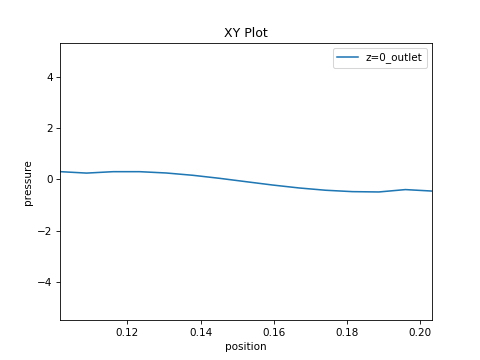

In [51]:
p1.plot("p1")

In [27]:
p1.y_axis_function = "velocity-magnitude"
xyplotter.refresh("", ["p1"])

In [26]:
p1.y_axis_function =  "pressure"
xyplotter.refresh("", ["p1"])

<IPython.core.display.Javascript object>


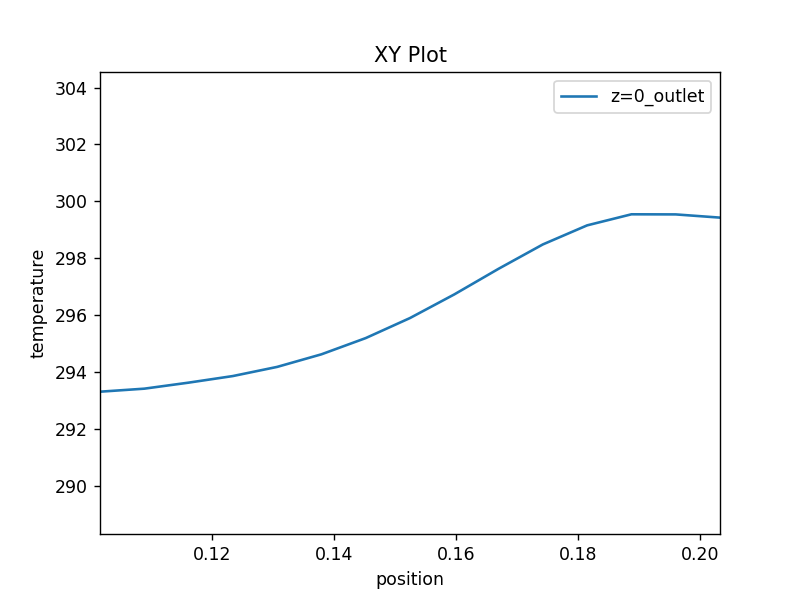

In [28]:
p2.plot("p2")

## Postprocessing / Animation during solve
Event manager provide functionality to execte callbacks during run time. This callback can refresh graphics and cretae animations.
Callbacks are invoked with session id and event info.


In [29]:
session.events_manager.events_list

['CalculationsEndedEvent',
 'CalculationsStartedEvent',
 'CaseReadEvent',
 'DataReadEvent',
 'InitializedEvent',
 'IterationEndedEvent',
 'TimestepEndedEvent']

### Define callbacks

In [43]:
from ansys.generic import execute_in_event_loop_threadsafe

@execute_in_event_loop_threadsafe
def auto_refersh_call_back_iteration(session_id, event_info):
    if event_info.index%5==0:
        plotter.refresh(session_id, ["plotter-1", "plotter-4"])


        
@execute_in_event_loop_threadsafe
def auto_refersh_call_back_time_step(session_id, event_info):    
    plotter.refresh(session_id, ["plotter-1", "plotter-4"])
    
@execute_in_event_loop_threadsafe    
def initialize_call_back(session_id, event_info):
    plotter.refresh(session_id) 


### Register callbacks

In [44]:
cb_init_id = session.events_manager.register_callback('InitializedEvent', initialize_call_back)
cb_data_read_id = session.events_manager.register_callback('DataReadEvent', initialize_call_back)
cb_itr_id = session.events_manager.register_callback('IterationEndedEvent', auto_refersh_call_back_iteration)
#cb_time_step_id = session.events_manager.register_callback('TimestepEndedEvent', auto_refersh_call_back_time_step)

### Un Register callbacks

In [50]:
session.events_manager.unregister_callback(cb_init_id)
session.events_manager.unregister_callback(cb_data_read_id)
session.events_manager.unregister_callback(cb_itr_id)


## Monitors

Monitor manager manages solver monitors/residuals. It shall plot data on registered plotter.

In [ ]:
#session.monitors_manager.register_plotter(xyplotter)


In [ ]:
#session.monitors_manager.stop()

### Animations

Specify plotters id to animate

In [45]:
plotter.animate("", ["plotter-1", "plotter-4"])

In [46]:
session.tui.solver.solve.iterate(number_of_iterations=100)
#session.tui.solver.solve.dual_time_iterate(20, 20).result()

<Future at 0x1ded8bb72c8 state=running>

### Close plotter to write animations

In [47]:
plotter.close()

### Play animation by loading gif file

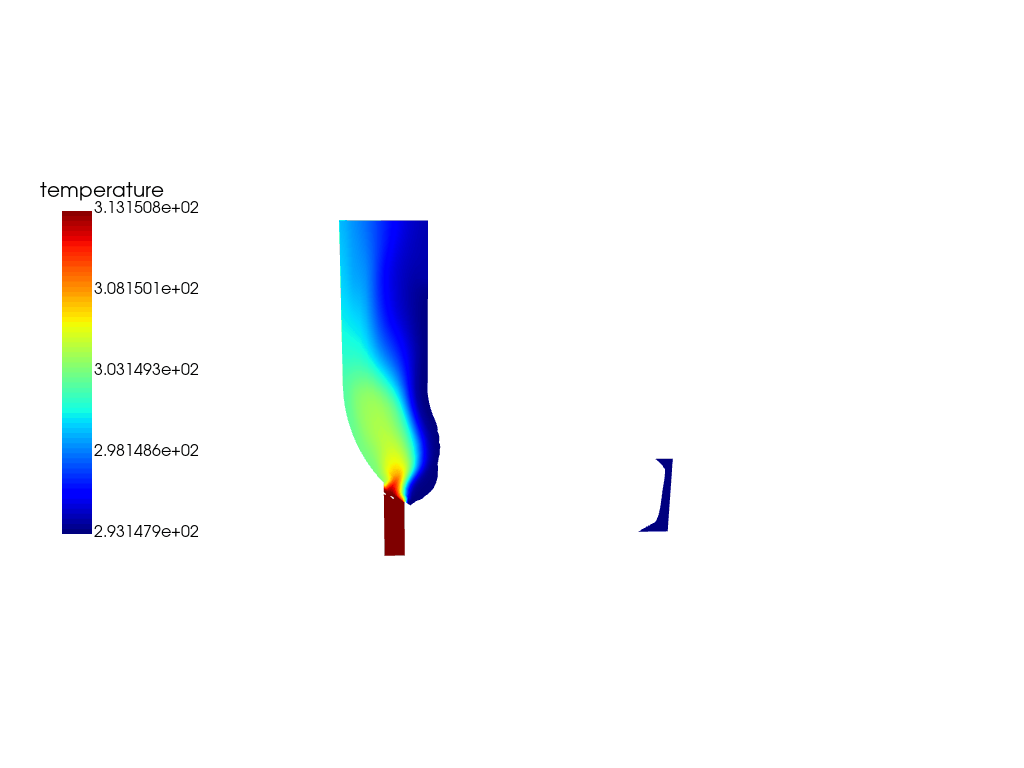

In [48]:
from IPython.display import Image
Image(filename="plotter-1.gif") 

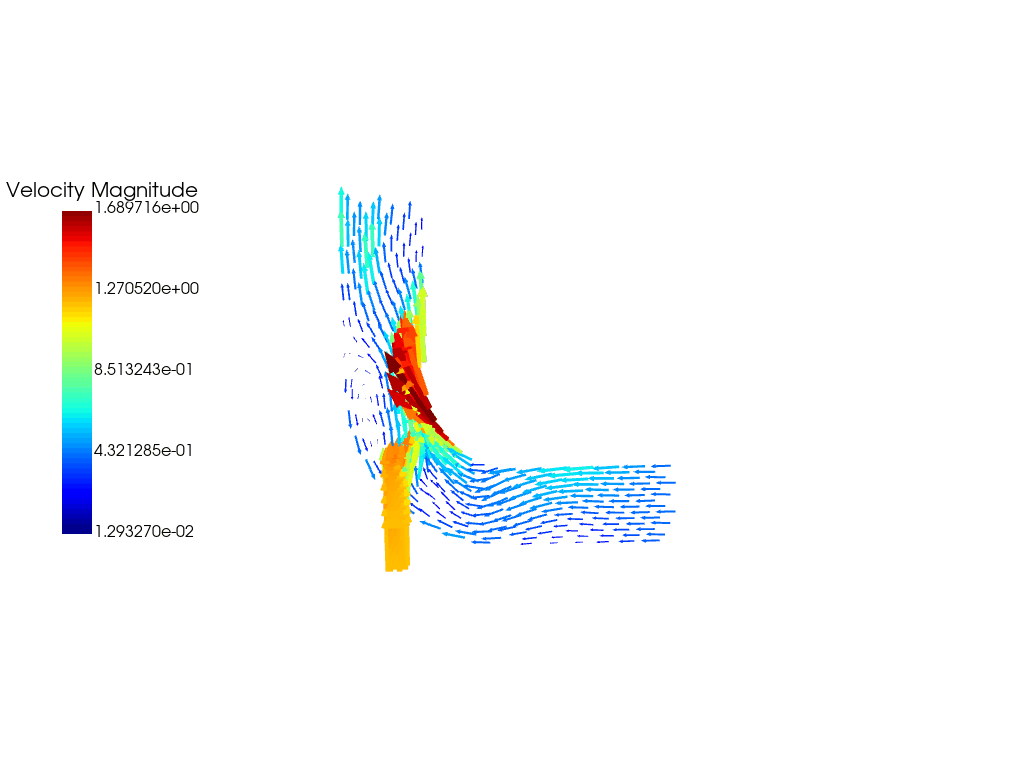

In [49]:
Image(filename="plotter-4.gif") 

## Experimental [GUI]

Custom widgets can be created for better user interaction. Custom graphics widget can create UI from graphics object.
It can be created by passing graphics object and some active window id.

In [30]:
from ansys.widgets import GraphicsWidget


In [53]:
plotter.open_window("plotter-5")

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [54]:
GraphicsWidget(vector1, "plotter-5")

<IPython.core.display.Javascript object>


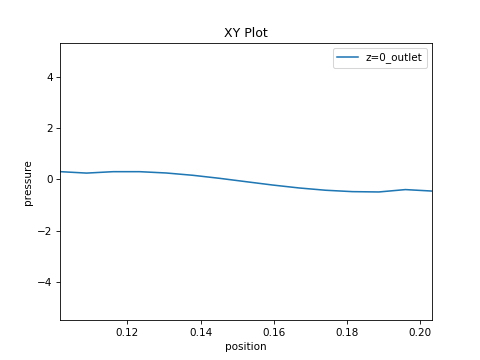

{'plotter': <ansys.fluent.postprocessing.matplotlib.process_plotter.SimplePlotter at 0x1ded65f6208>,
 'refresh': False}

In [37]:

xyplotter.open_window("plotter-1")



In [38]:
p1=xyplots_session1["p1"]
p1.surfaces_list = ["z=0_outlet"]
p1.y_axis_function = "temperature"

GraphicsWidget(p1, "plotter-1")

XYPlot
